In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2get_metric_ensemble

# Track 2 (trajectories) 

## Ensemble metrics
File format: txt file with first with format:

model: name_model \
$\mu_\alpha^1$;   $\mu_\alpha^2$ ;     ... \
$\sigma_\alpha^1$;  $\sigma_\alpha^2$ ; ...  \
$\mu_D^1$ ;        $\mu_D^2$ ;         ...  \
$\sigma_D^1$ ;      $\sigma_D^2$ ;     ... \
$N_1$, $N_2$, ... 

where $\mu_i$ is the mean and $\sigma_i$ the variance of the distribution of state $i$ and $N_i$ the number of counts of that state. The name of the model has to be chosen between :

['single_state',  'multi_state', 'immobile_traps', 'dimerization', 'confinement']

### Read data distribution data

In [3]:
true = np.loadtxt('data_seed/ens_labs_exp_3_fov_0.txt', skiprows=1, delimiter = ';')
pred = np.loadtxt('data_seed/ens_labs_exp_0_fov_0.txt', skiprows=1, delimiter = ';')

### Implement distribution metrics

In [4]:
from andi_datasets.utils_challenge import get_metric_ensemble

In [5]:
mae_alpha, mae_D, dist = get_metric_ensemble(pred, true, return_distributions=True)

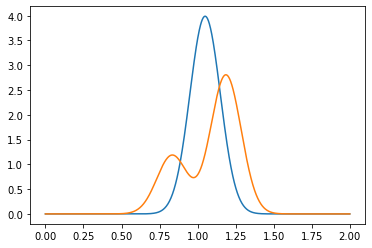

In [12]:
alpha = np.linspace(0, 2, 1000)
plt.plot(alpha, dist[0], label = 'True')
plt.plot(alpha, dist[2], label = 'Label')

In [11]:
get_metric_ensemble??

Signature: get_metric_ensemble(true_data, pred_data, return_distributions=False)
Docstring: <no docstring>
Source:   
def get_metric_ensemble(true_data, pred_data, return_distributions = False):

    dists = []
    for data in [true_data, pred_data]:

        if len(data.shape) > 1: # If we have more than one state
            alpha_info = np.delete(data, [2,3, -1], 0)
            d_info = data[2:-1,:]
            weights = data[-1,:]
            if weights.sum() > 1: weights /= weights.sum()
        else: # If single state
            alpha_info = data[:2]
            d_info = data[2:-1]
            weights = 1

        for idx, (var, bound) in enumerate(zip([alpha_info, d_info],
                                               [models_phenom().bound_alpha, models_phenom().bound_D])):
            if idx == 0: x = np.linspace(bound[0], bound[1], 1000)
            else: x = np.logspace(np.log10(bound[0]), np.log10(bound[1]), 1000)
            dists.append(multimode_dist(var.T, weights, bo